In [2]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import copy

from shapely import Point
from shapely import affinity, set_precision
from shapely.plotting import plot_points

#sys.path.insert(1, '/Users/neoh/Documents/git/eeroqlab/')
sys.path.insert(1, '/Users/helium/Documents/git/eeroqlab/')

%matplotlib inline
%config InlineBackend.figure_format='retina'


In [3]:
from zeroheliumkit.dev.core import GeomCollection
from zeroheliumkit.dev.anchors import *
from zeroheliumkit.dev.geometries import *
from zeroheliumkit.dev.supercore import *
from zeroheliumkit.dev.functions import *

from zeroheliumkit.settings import *
from zeroheliumkit.helpers.plotting import *

colorlist = [BLUE, YELLOW2, RED, GREEN, GRAY]

0.0


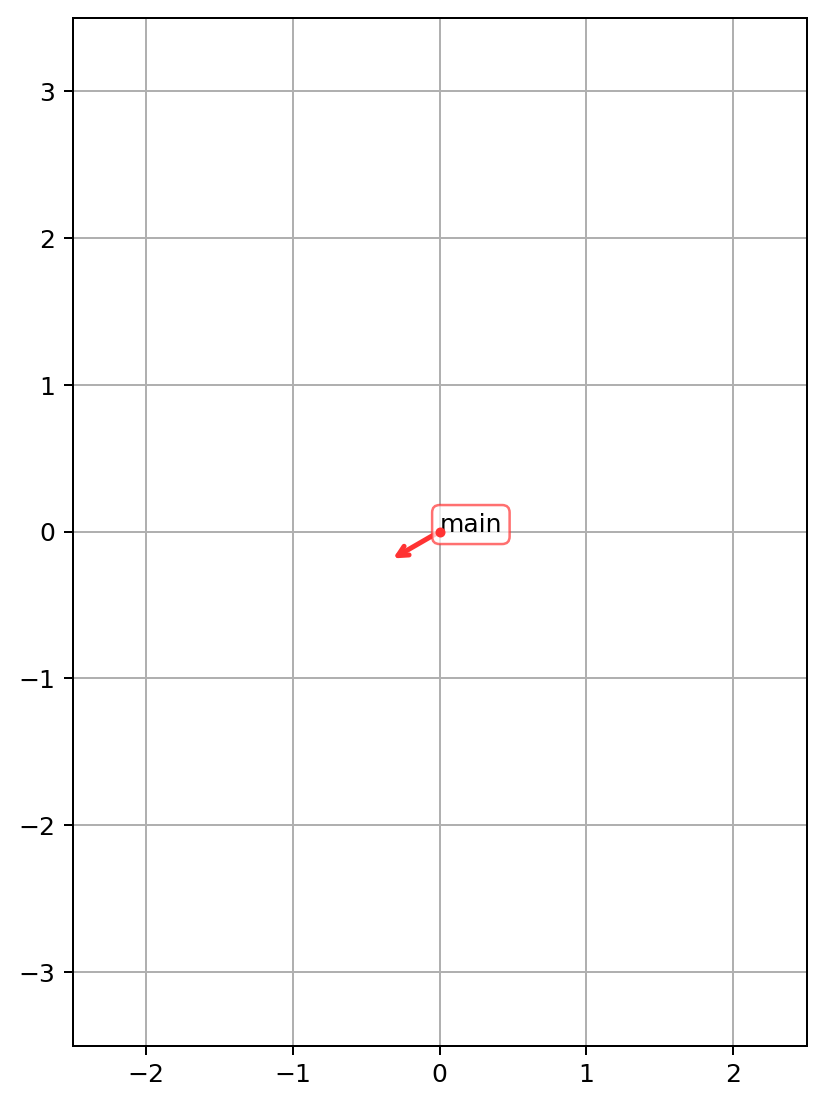

In [4]:
p = Anchor((0,0), 10, "main")
p.rotate(920)
print(p.x)

fig = plt.figure(1, figsize=SIZE_L, dpi=90)
ax = fig.add_subplot(111)
set_limits(ax=ax, coor=(0,0), dxdy=[5, 7])

p.plot(ax=ax, color=RED)

plt.grid()
plt.gca().set_aspect('equal')
plt.show()

In [5]:
config = {"top": True,
          "gnd": True}

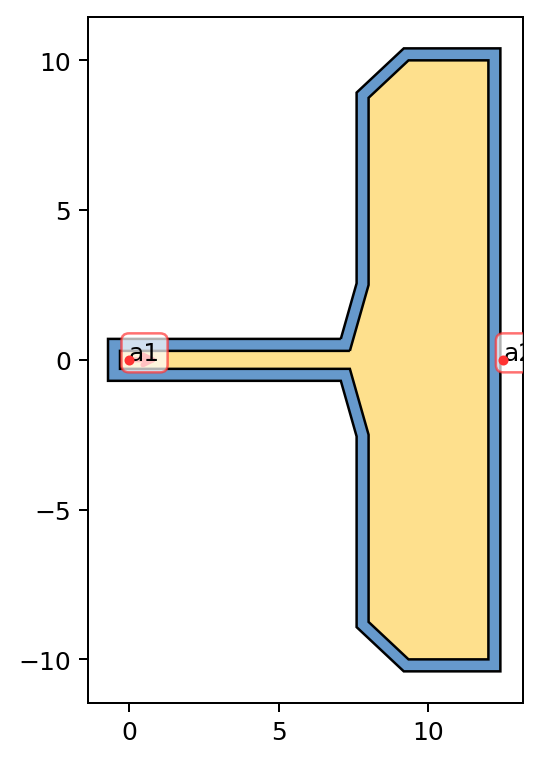

In [6]:
pg = PinchGate(arm_w = 0.6, 
               arm_l = 8, 
               length = 20, 
               width = 4)
pgate_base = GeomCollection(layers={"top": pg,
                                    "gnd": pg.buffer(0.4, join_style="mitre"),
                                    "anchorsmod": MultiAnchor([Anchor((0,0), 0, "a1"), Anchor((8 + 4 + 0.5, 0), 0, "a2")])})


fig = plt.figure(1, figsize=SIZE, dpi=90)
ax = fig.add_subplot(111)
pgate_base.plot(ax=ax, layer=["gnd", "top", "anchorsmod"], color=colorlist)
plt.gca().set_aspect('equal')
plt.show()

In [7]:
pgate_base.add_anchor([Anchor((5,5), 56, "b1"), Anchor((5,-5), -56, "b2")])
pgate_base.rotate(49)

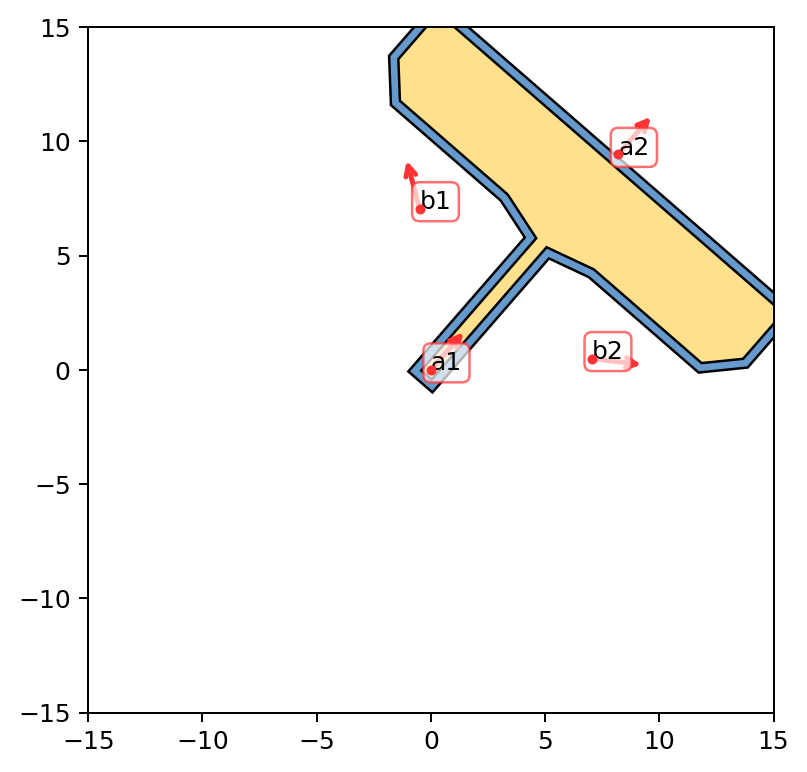

In [8]:
fig = plt.figure(1, figsize=SIZE, dpi=90)
ax = fig.add_subplot(111)
set_limits(ax=ax, coor=[0,0], dxdy=[30,30])
pgate_base.plot(ax=ax, layer=["gnd", "top", "anchorsmod"], color=colorlist, draw_direction=True)
plt.gca().set_aspect('equal')
plt.show()

In [9]:
pgate_base.get_anchor("a1").properties

-----  ----------  ---------
label  coords      direction
a1     (0.0, 0.0)  49.0
-----  ----------  ---------


In [10]:
pts = [(0,0), (5,1), (7,6), (10,6), (13,10)]
w1 = np.asarray([0.5, 0.6, 0.7, 0.8, 0.9])
g1 = np.asarray([0.1, 1.2, 0.3, 0.4, 0.5]) * 2
ll = {"l1": 0.5, "l2": 1.9}

EL = ArbitraryLine(pts, ll, ("m1", "m2"))

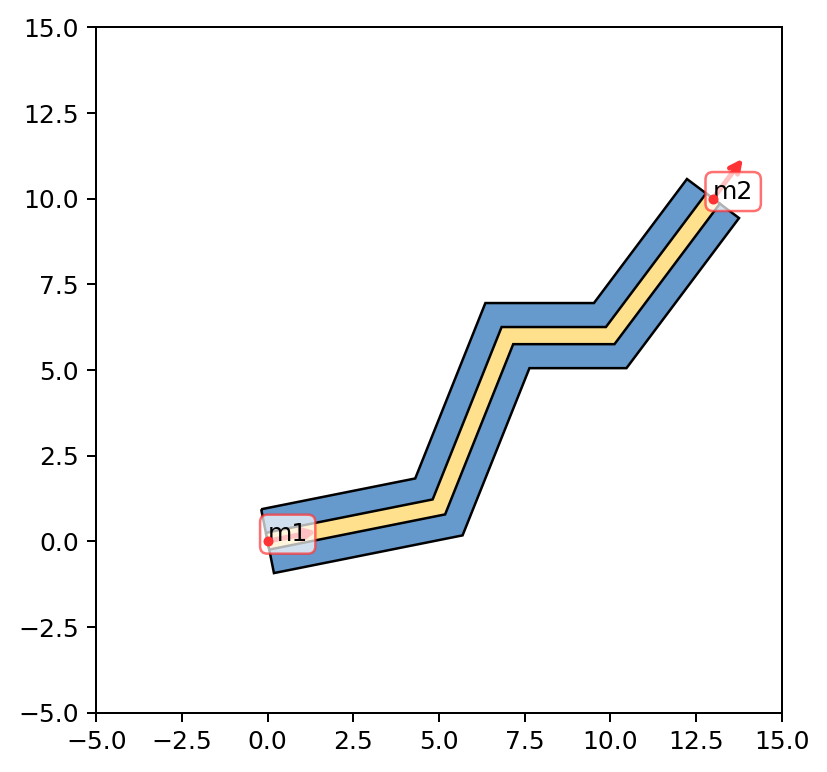

In [11]:
fig = plt.figure(1, figsize=SIZE, dpi=90)
ax = fig.add_subplot(111)
set_limits(ax=ax, coor=[5,5], dxdy=[20,20])
EL.plot(ax=ax, layer=["l2", "l1", "anchorsmod"], color=colorlist, draw_direction=True)
plt.gca().set_aspect('equal')
plt.show()

In [12]:
ltp = {"top": (2,0.6), "gnd": (2 + 1,0.6 + 2*0.4)}
TP = Taper(5, ltp, ("m1", "m2"))

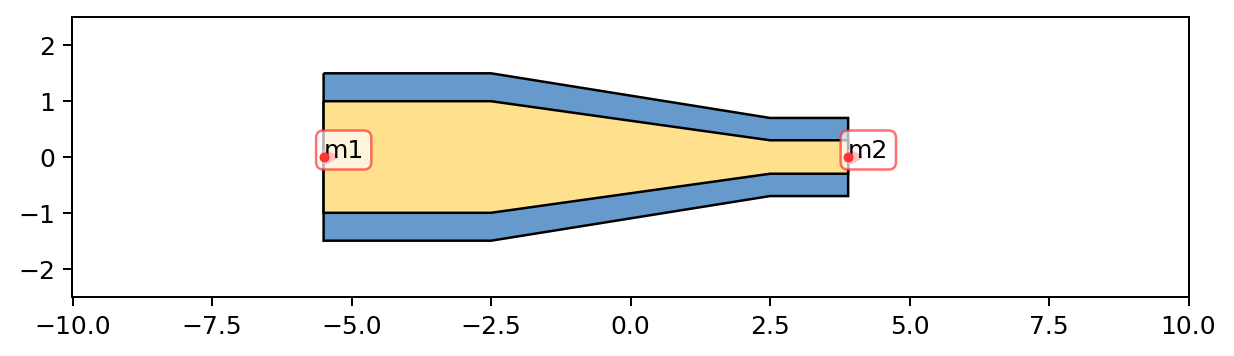

In [13]:
fig = plt.figure(1, figsize=SIZE, dpi=90)
ax = fig.add_subplot(111)
set_limits(ax=ax, coor=[0,0], dxdy=[20,5])
TP.plot(ax=ax, layer=["gnd", "top", "anchorsmod"], color=colorlist, draw_direction=True)
plt.gca().set_aspect('equal')
plt.show()

In [14]:
pgate = Structure()
pgate.append(pgate_base)
pgate.append(TP, anchoring=("a1","m2"), direction_snap=True)
print(type(pgate.anchorsmod.multipoint))
pgate.remove_anchor(["m2","a1","b2"])
print(type(pgate.anchorsmod.multipoint))

<class 'list'>
<class 'list'>


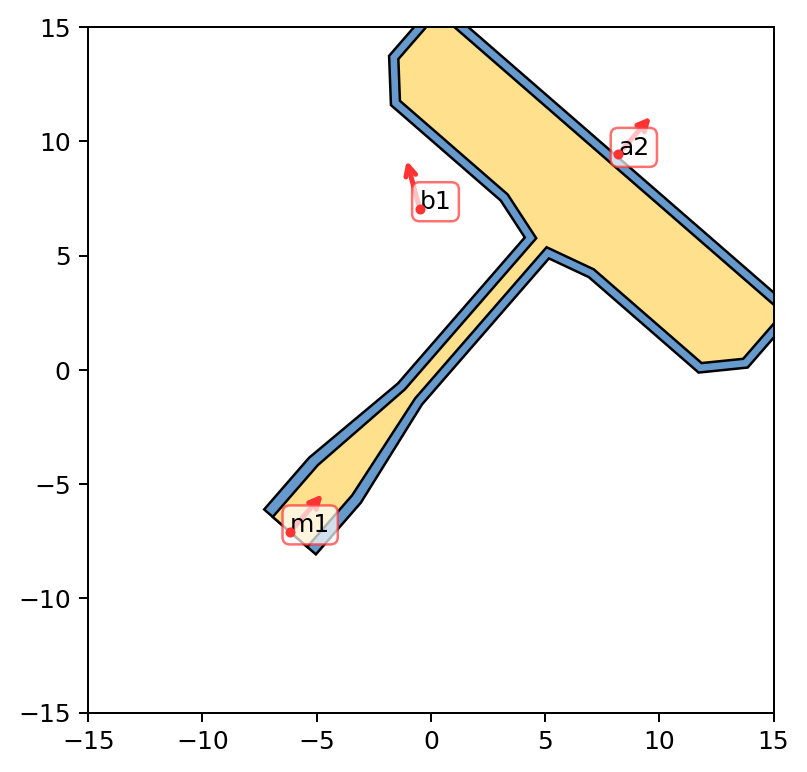

In [15]:
fig = plt.figure(1, figsize=SIZE, dpi=90)
ax = fig.add_subplot(111)
set_limits(ax=ax, coor=[0,0], dxdy=[30,30])
pgate.plot(ax=ax, layer=["gnd", "top", "anchorsmod"], color=colorlist, draw_direction=True)
plt.gca().set_aspect('equal')
plt.show()

using smaller radius for routing
iter
iter
iter
iter
iter


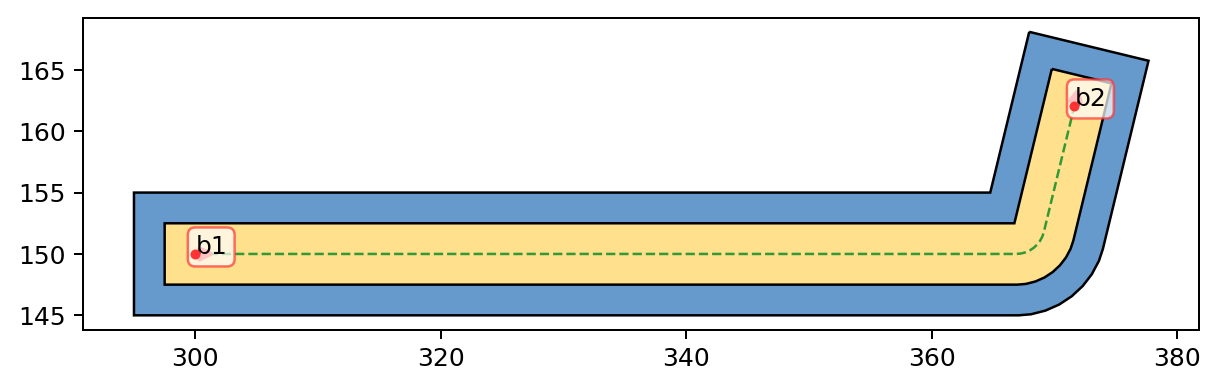

In [16]:
layer_info = {"metal": 5,
              "etch": 10}

p1 = Anchor((0, 0), 90)
p2 = Anchor((30, 30), 0)

p3 = Anchor((0, 0), 0)
p4 = Anchor((130, -20), 80)

p5 = Anchor((300.0, 150.0), 0)
p6 = Anchor((371.6186, 161.059 + 1), 1.909152433002987 * 40)

route = ElbowLine(p5, p6, radius=30, num_segments=9, layers=layer_info, alabel=("b1", "b2"))
#route.rotate(-53)
#route.get_anchor("b2").properties

fig = plt.figure(1, figsize=SIZE, dpi=90)
ax = fig.add_subplot(111)
#set_limits(ax=ax, coor=[0,0], dxdy=[150,80])
route.plot(ax=ax, layer=["etch", "metal", "anchorsmod", "skeletone"], color=colorlist)
plt.gca().set_aspect('equal')
plt.show()

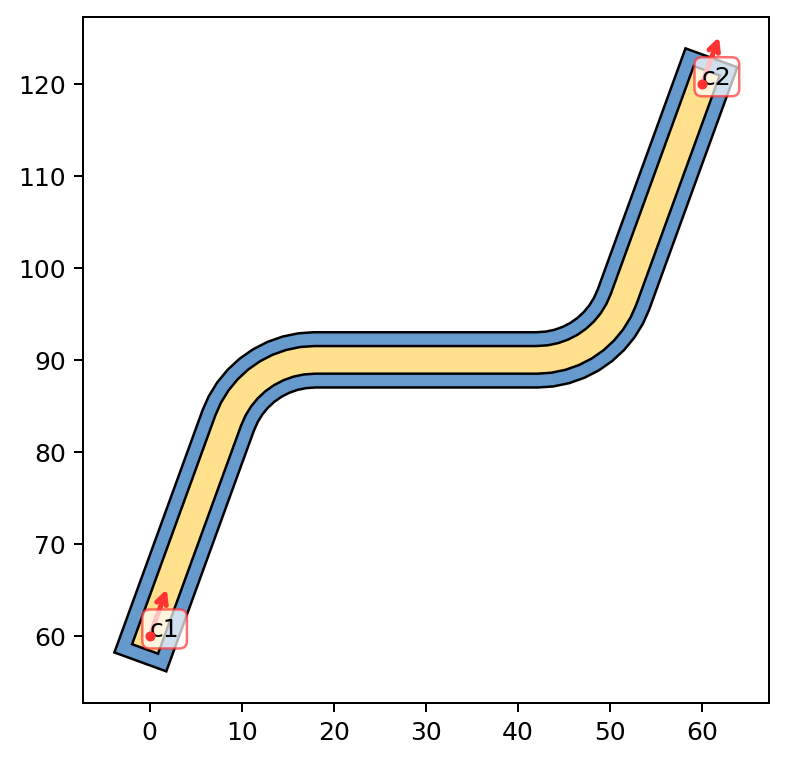

In [17]:
layer_info = {"top": 3,
              "gnd": 6}

p1 = Anchor(Point(0,0), 70)
p2 = Anchor(Point(60,60), 70)
r2 = SigmoidLine(p1, p2, 0, radius=10, num_segments=10, layers=layer_info, alabel=("c1", "c2"))
r2.moveby(xy=(0, 60))

fig = plt.figure(1, figsize=SIZE, dpi=90)
ax = fig.add_subplot(111)
r2.plot(ax=ax, layer=["gnd", "top", "anchorsmod"], color=colorlist)
plt.gca().set_aspect('equal')
plt.show()

In [18]:
layer_info = {"top": 3,
              "gnd": 6}
max(layer_info.values())

6

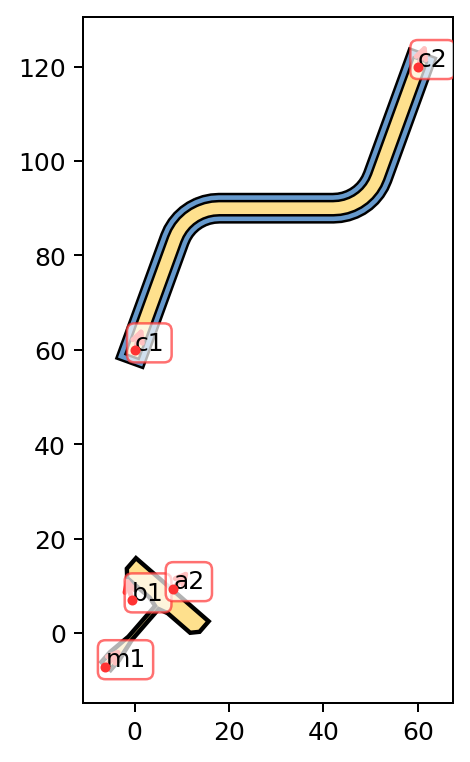

In [19]:
pgate.append(r2)
fig = plt.figure(1, figsize=SIZE, dpi=90)
ax = fig.add_subplot(111)
#set_limits(ax=ax, coor=[0,0], dxdy=[30,30])
pgate.plot(ax=ax, layer=["gnd", "top", "anchorsmod"], color=colorlist, draw_direction=True)
plt.gca().set_aspect('equal')
plt.show()

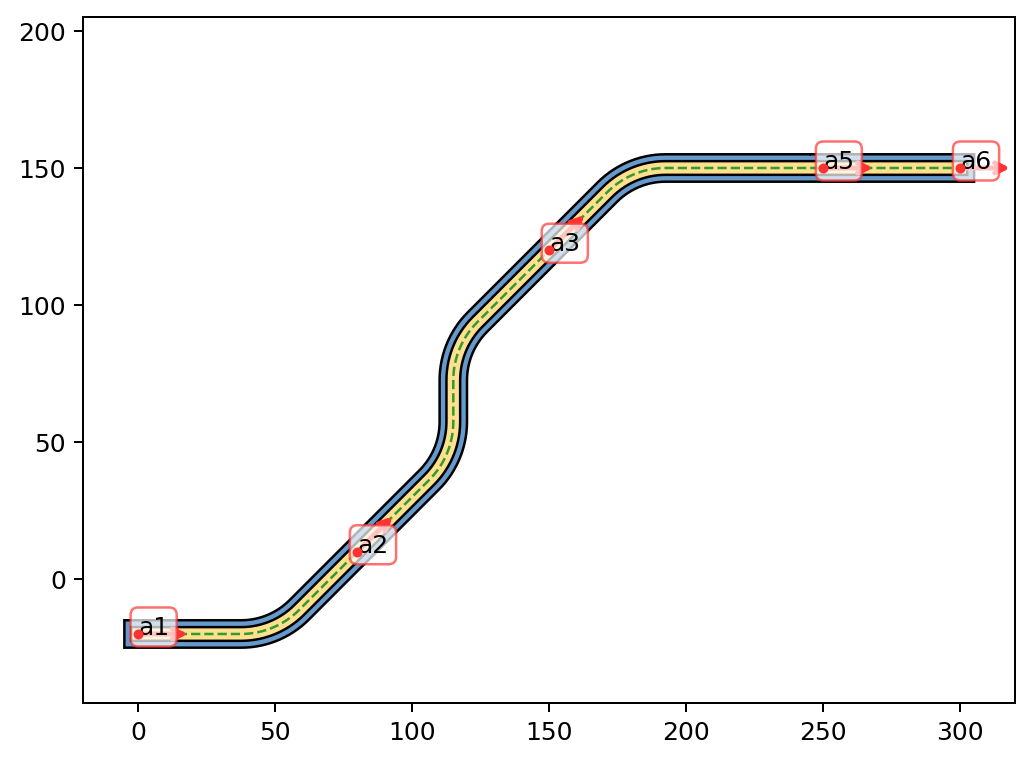

In [20]:
route_config = {"radius": 30, "num_segments": 16}

ss = SuperStructure(route_config)
ss.add_anchor([Anchor((0,-20), 0, "a1"),
               Anchor((80,10), 45.0000001, "a2"),
               Anchor((150,120), 45, "a3"),
               Anchor((250,150), 0, "a5"),
               Anchor((300,150), 00, "a6")])

ss.route(("a1", "a2", "a3"), layers={"top": 5, "gnd": 10})
ss.route(("a3", "a5", "a6"), layers={"top": 5, "gnd": 10})

fig = plt.figure(1, figsize=SIZE, dpi=90)
ax = fig.add_subplot(111)
set_limits(ax=ax, coor=[150,80], dxdy=[340,250])
ss.plot(ax=ax, layer=["gnd", "top", "anchorsmod", "skeletone"], color=colorlist, draw_direction=True)
plt.gca().set_aspect('equal')
plt.show()

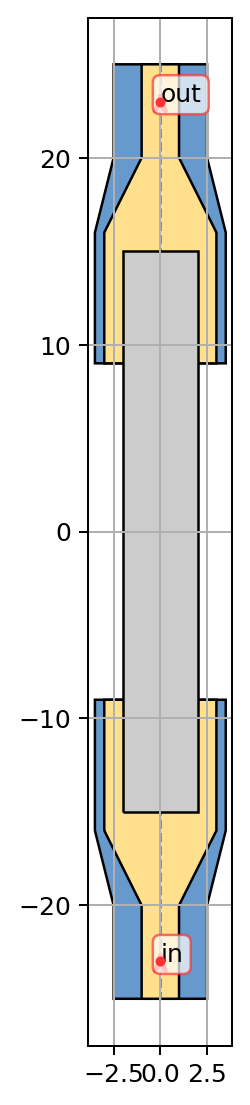

In [21]:
airb = {"w":4, "ol":2, "g":1, "l":30}

ab_opening = airb["w"] + airb["ol"]
ab_pad = ab_opening + airb["ol"]

ab = Taper(length = 4,
           layers = {"top": (6, 2),
                     "gnd": (7, 5)},
           alabel=("a1", "a2"))
ab.get_anchor("a1").move(xoff=4)
ab.get_anchor("a2").move(xoff=-2)
ab.moveby_snap(anchor="a1", to_point=(0,0))
ab.add_layer("open", Square(ab_opening))
ab.add_layer("air", affinity.translate(Rectangle(airb["l"]/2, airb["w"]), -airb["l"]/4 + airb["ol"]))
ab.rotate(90)
ab.moveby(xy=(0, airb["l"]/2 - airb["ol"]))
ab.mirror(aroundaxis="x", update_labels=True, keep_original=True)
ab.remove_anchor(["a1", "a1_m"])

ab_main = ab.copy()
ab_main.modify_anchor(label="a2", new_name="out")
ab_main.modify_anchor(label="a2_m", new_name="in", new_direction=90)

ab.remove_anchor(["a2", "a2_m"])

fig = plt.figure(1, figsize=SIZE_L, dpi=90)
ax = fig.add_subplot(111)
ab_main.plot(ax=ax, layer=["gnd", "top", "anchorsmod", "skeletone", "air"], color=colorlist, draw_direction=True)
#plot_polygon(airbridge.open, ax=ax, add_points=False, facecolor=None, edgecolor=RED, ls="-", lw=2)
plt.grid()
plt.gca().set_aspect('equal')
plt.show()

ab.skeletone = MultiLineString()

[183.81407483 176.18592517]
['in', 'out']
['a6', '0in', '0out', '1in', '1out', 'a7']
('a6', '0in')
('0out', '1in')
('1out', 'a7')


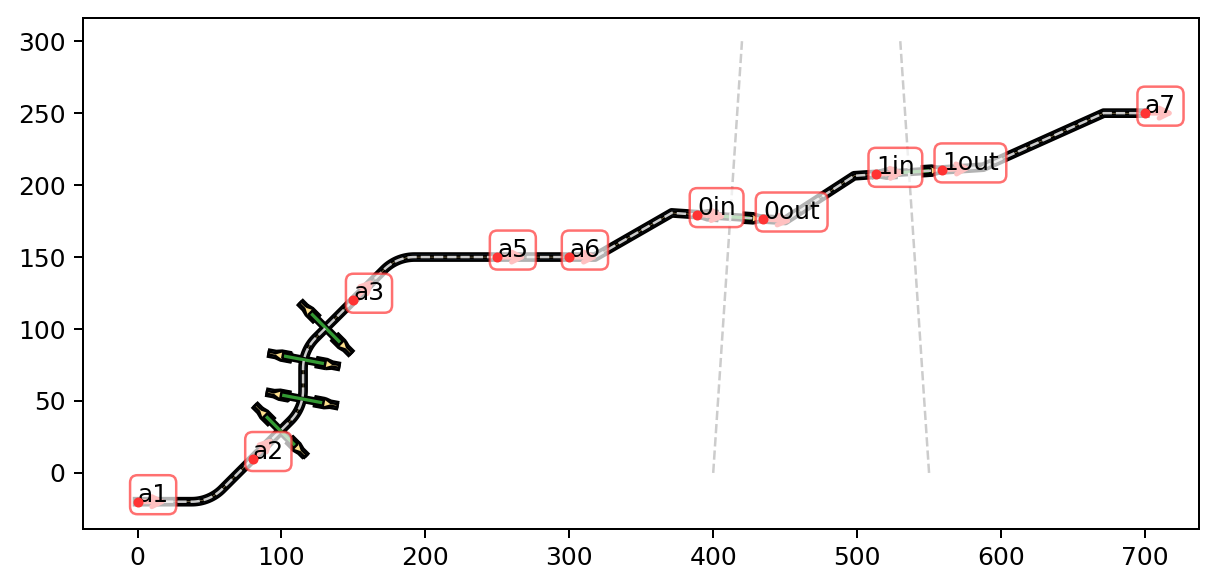

In [26]:
route_config = {"radius": 30, "num_segments": 20}

ss = SuperStructure(route_config)
ss.add_anchor([Anchor((0,-20), 0, "a1"),
               Anchor((80,10), 45, "a2"),
               Anchor((150,120), 45, "a3"),
               Anchor((250,150), 0, "a5"),
               Anchor((300,150), 00, "a6")])

ss.route(("a1", "a2", "a3"), layers={"top": 2, "gnd": 5})
ss.route(("a3", "a5", "a6"), layers={"top": 2, "gnd": 5})
#ss.scale(5, 5)

ss.add_along_skeletone(bound_anchors=("a2", "a3"), num=4, structure=ab)
ss.fix_line()
ss.skeletone = unary_union([ss.skeletone, 
                            LineString([(400, 0), (420, 300)]), 
                            LineString([(550, 0), (530, 300)])])

ss.add_anchor(Anchor((700, 250), 0, "a7"))

ss.route_with_intersection(("a6", "a7"), layers={"top": 2, "gnd": 5}, airbridge=ab_main)

fig = plt.figure(1, figsize=SIZE, dpi=90)
ax = fig.add_subplot(111)
#set_limits(ax=ax, coor=[475,150], dxdy=[350,150])
ss.plot(ax=ax, layer=["gnd", "top", "anchorsmod", "air", "skeletone"], color=colorlist, draw_direction=True)
plt.gca().set_aspect('equal')
#plt.grid()
plt.show()

using smaller radius for routing
iter
iter
something went wrong with setting precision
the error is  TopologyException: side location conflict at 305.19330000000002 149. This can occur if the input geometry is invalid.
something went wrong with setting precision
the error is  TopologyException: side location conflict at 371.34590000000003 167.5. This can occur if the input geometry is invalid.


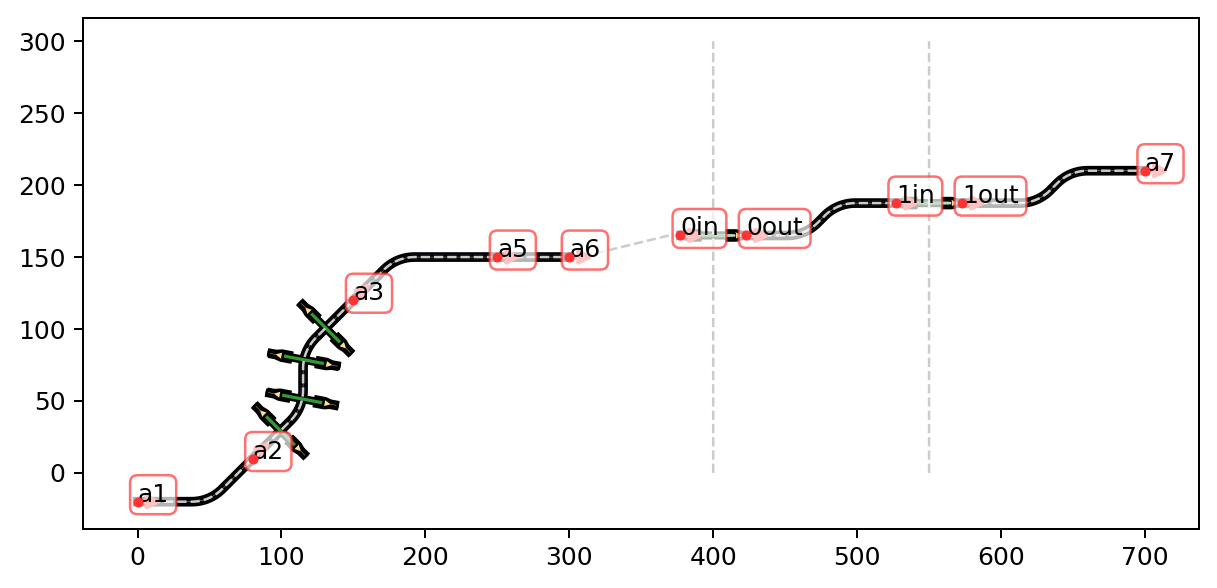

In [22]:
ss.route_with_intersection(("a6", "a7"), layers={"top": 2, "gnd": 5}, airbridge=ab_main)

fig = plt.figure(1, figsize=SIZE, dpi=90)
ax = fig.add_subplot(111)
#set_limits(ax=ax, coor=[350,150], dxdy=[240,150])
ss.plot(ax=ax, layer=["gnd", "top", "anchorsmod", "air", "skeletone"], color=colorlist, draw_direction=True)
plt.gca().set_aspect('equal')
#plt.grid()
plt.show()

In [22]:
ss.get_anchor("a6").properties
ss.get_anchor("0in").properties

-----  --------------  ---------
label  coords          direction
a6     (300.0, 150.0)  0.0
-----  --------------  ---------
-----  --------------------  -------------------
label  coords                direction
0in    (387.9753, 165.3954)  -3.8140748342854067
-----  --------------------  -------------------


using smaller radius for routing
iter


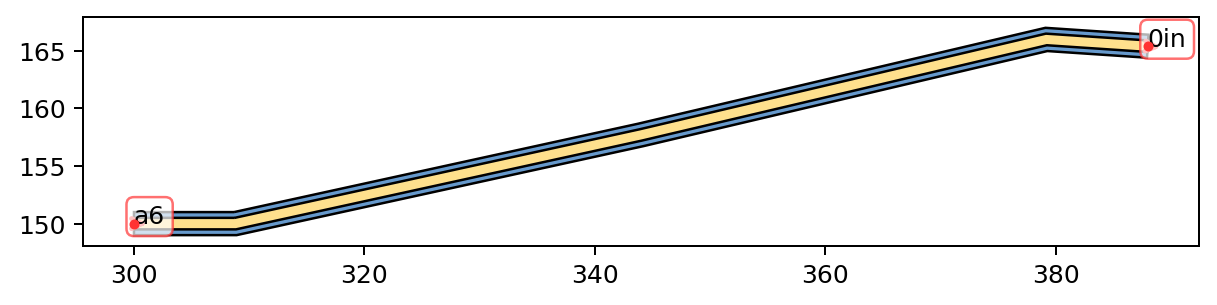

In [23]:
layer_info = {"metal": 1,
              "etch": 2}

a1 = ss.get_anchor("a6")
a2 = ss.get_anchor("0in")
#a1.direction = 45

#route = ElbowLine(a1, a2, radius=30, num_segments=20, layers=layer_info, alabel=("b1", "b2"))
route = SigmoidLine(a1, a2, 45, radius=30, num_segments=20, layers=layer_info, alabel=(a1.label, a2.label))

fig = plt.figure(1, figsize=SIZE, dpi=90)
ax = fig.add_subplot(111)

#set_limits(ax=ax, coor=[0,0], dxdy=[150,80])
route.plot(ax=ax, layer=["etch", "metal", "anchorsmod"], color=colorlist)
plt.gca().set_aspect('equal')
plt.show()

In [82]:
def modFMOD(angle):
    if np.abs(angle) % 360 == 180:
        return 180
    elif np.abs(angle) % 360 < 180:
        return fmod(angle, 360)
    elif np.sign(angle) > 0:
        return angle % 360 - 360
    else:
        return angle % 360

modFMOD(-215)

145

In [60]:
from shapely import intersection_all

In [28]:
line1 = LineString([(0, 0), (10.5, 0)])
line2 = MultiLineString([LineString([(4.7, 1), (4.7, -1)]), LineString([(2, 1), (2, -1)]), LineString([(4, 1), (4, -1)])])
intersect_points = intersection_all([line1, line2])
intersect_points
print(list(intersect_points.geoms))

[<POINT (4.7 0)>, <POINT (2 0)>, <POINT (4 0)>]


In [41]:
line = LineString([(0, 2), (0, 10)])
point = Point(4, 4)
point2 = Point(6, 6)
line_locate_point(line, [point, point2], normalized=True)

array([0.25, 0.5 ])

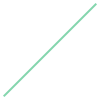

In [21]:
point = Point(4, 4)
point2 = Point(6, 6)
LineString([point, point2])